## What are the factors of logerror?

In [1]:
# regular imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
from env import host, user, password

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler

## Project Goal

The goal of this project is to identify the drivers that determine the logerror of price of single family properties by constructing an ML Regression model with features from clustering.

## Project Description

The cost of living and inflation is on the rise. The price of rent is also increasing and there is higher demand to purchase a home more than ever. Buyers want to find the home that works best for them. Buyers are using Zillow during their home buying journey to look for their potential new home. We will analayze data of homes that were purchased in the year 2017 from Zillow. The data will be helpful to determine factors that the logerror of a home. 

Logerror is the following:

Logerror = log(Zillow home estimate) - log(home value)

## Initial Questions

- Does the size of the lot and the square footage of the home impact the logerror?

- Does the county where the home is located impact the logerror?

- Does luxuary features like fireplace or pool impact the logerror of a home?

- Does the home being tax deliquent impact the log error?

## Data Dictionary

| Feature                        | Description                                                                                                            |
|--------------------------------|------------------------------------------------------------------------------------------------------------------------|
| 'airconditioningtypeid'        |  Type of cooling system present in the home (if any)                                                                   |
| 'architecturalstyletypeid'     |  Architectural style of the home (i.e. ranch, colonial, split-level, etc…)                                             |
| 'basementsqft'                 |  Finished living area below or partially below ground level                                                            |
| 'bathroomcnt'                  |  Number of bathrooms in home including fractional bathrooms                                                            |
| 'bedroomcnt'                   |  Number of bedrooms in home                                                                                            |
| 'buildingqualitytypeid'        |  Overall assessment of condition of the building from best (lowest) to worst (highest)                                 |
| 'buildingclasstypeid'          | The building framing type (steel frame, wood frame, concrete/brick)                                                    |
| 'calculatedbathnbr'            |  Number of bathrooms in home including fractional bathroom                                                             |
| 'decktypeid'                   | Type of deck (if any) present on parcel                                                                                |
| 'threequarterbathnbr'          |  Number of 3/4 bathrooms in house (shower + sink + toilet)                                                             |
| 'finishedfloor1squarefeet'     |  Size of the finished living area on the first (entry) floor of the home                                               |
| 'calculatedfinishedsquarefeet' |  Calculated total finished living area of the home                                                                     |
| 'finishedsquarefeet6'          | Base unfinished and finished area                                                                                      |
| 'finishedsquarefeet12'         | Finished living area                                                                                                   |
| 'finishedsquarefeet13'         | Perimeter  living area                                                                                                 |
| 'finishedsquarefeet15'         | Total area                                                                                                             |
| 'finishedsquarefeet50'         |  Size of the finished living area on the first (entry) floor of the home                                               |
| 'fips'                         |  Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details   |
| 'fireplacecnt'                 |  Number of fireplaces in a home (if any)                                                                               |
| 'fireplaceflag'                |  Is a fireplace present in this home                                                                                   |
| 'fullbathcnt'                  |  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home                                         |
| 'garagecarcnt'                 |  Total number of garages on the lot including an attached garage                                                       |
| 'garagetotalsqft'              |  Total number of square feet of all garages on lot including an attached garage                                        |
| 'hashottuborspa'               |  Does the home have a hot tub or spa                                                                                   |
| 'heatingorsystemtypeid'        |  Type of home heating system                                                                                           |
| 'latitude'                     |  Latitude of the middle of the parcel multiplied by 10e6                                                               |
| 'longitude'                    |  Longitude of the middle of the parcel multiplied by 10e6                                                              |
| 'lotsizesquarefeet'            |  Area of the lot in square feet                                                                                        |
| 'numberofstories'              |  Number of stories or levels the home has                                                                              |
| 'parcelid'                     |  Unique identifier for parcels (lots)                                                                                  |
| 'poolcnt'                      |  Number of pools on the lot (if any)                                                                                   |
| 'poolsizesum'                  |  Total square footage of all pools on property                                                                         |
| 'pooltypeid10'                 |  Spa or Hot Tub                                                                                                        |
| 'pooltypeid2'                  |  Pool with Spa/Hot Tub                                                                                                 |
| 'pooltypeid7'                  |  Pool without hot tub                                                                                                  |
| 'propertycountylandusecode'    |  County land use code i.e. it's zoning at the county level                                                             |
| 'propertylandusetypeid'        |  Type of land use the property is zoned for                                                                            |
| 'propertyzoningdesc'           |  Description of the allowed land uses (zoning) for that property                                                       |
| 'rawcensustractandblock'       |  Census tract and block ID combined - also contains blockgroup assignment by extension                                 |
| 'censustractandblock'          |  Census tract and block ID combined - also contains blockgroup assignment by extension                                 |
| 'regionidcounty'               | County in which the property is located                                                                                |
| 'regionidcity'                 |  City in which the property is located (if any)                                                                        |
| 'regionidzip'                  |  Zip code in which the property is located                                                                             |
| 'regionidneighborhood'         | Neighborhood in which the property is located                                                                          |
| 'roomcnt'                      |  Total number of rooms in the principal residence                                                                      |
| 'storytypeid'                  |  Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details. |
| 'typeconstructiontypeid'       |  What type of construction material was used to construct the home                                                     |
| 'unitcnt'                      |  Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)                                    |
| 'yardbuildingsqft17'           | Patio in  yard                                                                                                         |
| 'yardbuildingsqft26'           | Storage shed/building in yard                                                                                          |
| 'yearbuilt'                    |  The Year the principal residence was built                                                                            |
| 'taxvaluedollarcnt'            | The total tax assessed value of the parcel                                                                             |
| 'structuretaxvaluedollarcnt'   | The assessed value of the built structure on the parcel                                                                |
| 'landtaxvaluedollarcnt'        | The assessed value of the land area of the parcel                                                                      |
| 'taxamount'                    | The total property tax assessed for that assessment year                                                               |
| 'assessmentyear'               | The year of the property tax assessment                                                                                |
| 'taxdelinquencyflag'           | Property taxes for this parcel are past due as of 2015                                                                 |
| 'taxdelinquencyyear'           | Year for which the unpaid propert taxes were due                                                                       |

## Acquistion of zillow family home data

To acquire the zillow home data, I used the zillow_db in our mySQL server using the query below.

'''

    SELECT prop. *,
    predictions_2017.logerror,
    predictions_2017.transactiondate,
    air.airconditioningdesc,
    arch.architecturalstyledesc,
    build.buildingclassdesc,
    heat.heatingorsystemdesc,
    land.propertylandusedesc,
    story.storydesc,
    type.typeconstructiondesc
    FROM properties_2017 prop
    JOIN (
                SELECT parcelid, MAX(transactiondate) AS max_transactiondate
                FROM predictions_2017
                GROUP BY parcelid) pred USING(parcelid)
    JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
    AND pred.max_transactiondate = predictions_2017.transactiondate
    LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
    LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
    LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
    LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
    LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
    LEFT JOIN storytype story USING(storytypeid)
    LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
    WHERE propertylandusedesc IN ('Single Family Residential' , 'Mobile Home', 'Manufactured, Modular, Prefabricated Homes', 'Patio Home', 'Bungalow', 'Planned Unit Development') 
    AND transactiondate <= '2017-12-31'
    AND prop.longitude IS NOT NULL
    AND prop.latitude IS NOT NULL;

'''

- Should acquire raw dataset that has 54395 rows and 67 columns
- The query will bring null values

In [2]:
# acquire data from sql database 
import acquire
 
# make the connection the database and run the query and return the table in the form of a dataframe. 
df = acquire.get_zillow_data()

## Wrangling of data

I filled in the majority of null values in the following columns:

'basementsqft', 'bathroomcnt', 'bedroomcnt', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa','poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear'

Created new columns:

'haspool', 'years_taxdeliquent', 'home_age','home_age_bin', 'taxrate', 'acres', 'acres_bin', 'sqft_bin','structure_dollar_per_sqft', 'structure_dollar_sqft_bin','land_dollar_per_sqft', 'lot_dollar_sqft_bin', 'bath_bed_ratio','fips_encoded', 'LA', 'Orange', 'Ventura'

Dropped remaining obersavations with null values and remaining unnessary columns

After futher review of data through exploration, I decided to remove outliers

- Refined dataset now has 52,385 rows and 40 columns


In [3]:
import wrangle

# Function that iputs nulls and drop observations with null values
df = wrangle.prep_familyhome17()

# Function that removes outliers from data
df = wrangle.remove_outliers()

df.shape

(52172, 40)

## Split data into 3 samples

In [4]:
# Splits data by county
df_la, df_ventura, df_orange = wrangle.subsets()

df_la.shape, df_ventura.shape, df_orange.shape

((34388, 25), (4316, 25), (13468, 25))

In [5]:
# Function that splits subset into train, validate and split
from wrangle import split

# Split df_la into test, validate and split
partitions = split(df_la, target_var='logerror')


In [6]:
partitions[0].shape, partitions[1].shape, partitions[2].shape

((19257, 25), (19257, 24), (8253, 24))

## Scale the data

In [7]:
# the variables that still need scaling
scaled_vars = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'taxrate', 'garagecarcnt', 'basementsqft', 'years_taxdeliquent' ]

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])


## Create clusters

Area Cluster

In [8]:
k = 4
# as reminders: 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'home_age_bin']
cluster_name = 'area_cluster'

def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 123)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

kmeans = create_clusters(X[0], k, cluster_vars)

# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(X)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_vars]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X[i] = pd.concat([X[i], clusters_centroids], axis=1)
    return X

X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

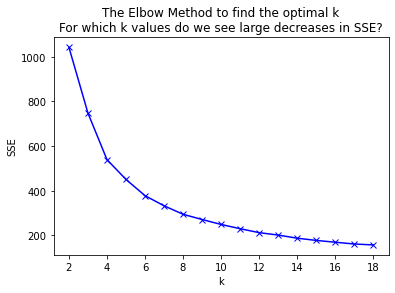

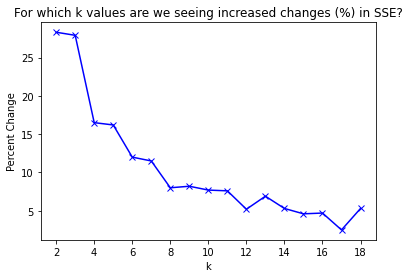

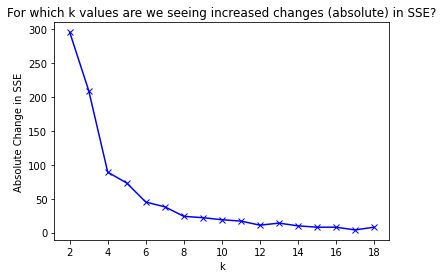

,k,sse,delta,pct_delta
0,2,"1,043.21",295.00,28.30
1,3,748.06,209.00,27.90
2,4,539.35,89.00,16.50
3,5,450.58,73.00,16.20
4,6,377.68,45.00,12.00
5,7,332.43,38.00,11.50
6,8,294.30,24.00,8.00
7,9,270.77,22.00,8.20
8,10,248.68,19.00,7.70
9,11,229.52,17.00,7.60


In [10]:
k_range = range(2,20)
def find_k(X_train, cluster_vars, k_range):
    
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

find_k(X[0], cluster_vars, k_range)

Size Cluster


In [11]:
k=6
cluster_name = 'size_cluster'
cluster_vars = ['scaled_bathrooms', 'sqft_bin', 'acres_bin', 'scaled_bedrooms']

# fit kmeans 
kmeans = create_clusters(X[0], k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

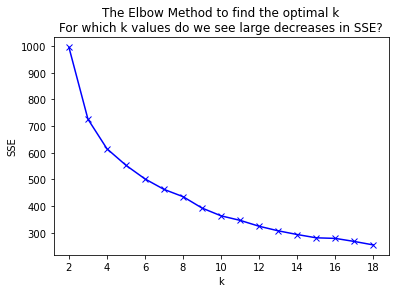

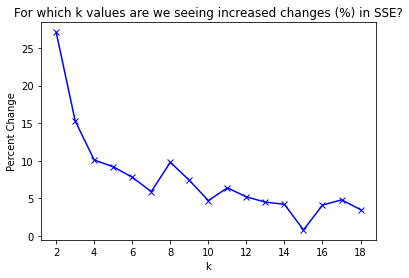

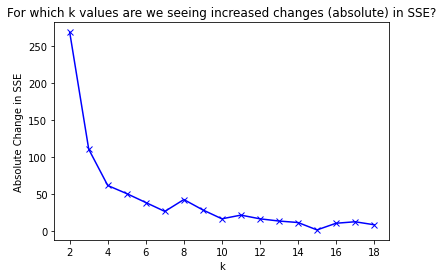

,k,sse,delta,pct_delta
0,2,995.40,269.00,27.10
1,3,725.98,111.00,15.30
2,4,614.99,62.00,10.10
3,5,553.06,51.00,9.20
4,6,501.99,39.00,7.80
5,7,462.78,27.00,5.90
6,8,435.54,43.00,9.80
7,9,392.81,29.00,7.40
8,10,363.72,17.00,4.70
9,11,346.77,22.00,6.40


In [12]:
cluster_vars = ['scaled_bathrooms', 'sqft_bin', 'acres_bin', 'scaled_bedrooms']
cluster_name = 'size_cluster'
k_range = range(2,20)

find_k(X[0], cluster_vars, k_range)

Tax Due cluster


In [13]:
k=3
cluster_name = 'tax_due_cluster'
cluster_vars = ['taxdelinquencyflag', 'years_taxdeliquent']

# fit kmeans 
kmeans = create_clusters(X[0], k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

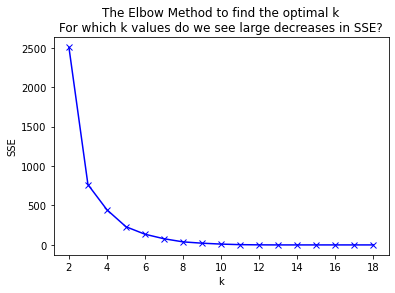

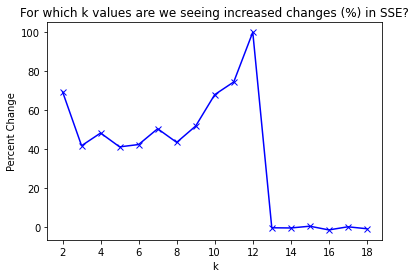

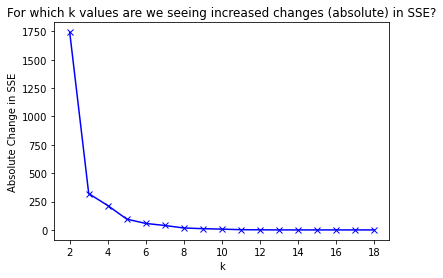

,k,sse,delta,pct_delta
0,2,"2,506.92","1,742.00",69.50
1,3,765.22,320.00,41.80
2,4,445.12,215.00,48.30
3,5,230.32,95.00,41.20
4,6,135.36,57.00,42.40
5,7,78.01,39.00,50.50
6,8,38.63,17.00,43.50
7,9,21.83,11.00,51.90
8,10,10.50,7.00,68.00
9,11,3.36,2.00,74.50


In [14]:
cluster_vars = ['taxdelinquencyflag', 'years_taxdeliquent']
cluster_name = 'tax_due_cluster'
k_range = range(2,20)

find_k(X[0], cluster_vars, k_range)


Price Cluster

In [15]:
k=5
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin','lot_dollar_sqft_bin' ]
cluster_name = 'price_cluster'

# fit kmeans 
kmeans = create_clusters(X[0], k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

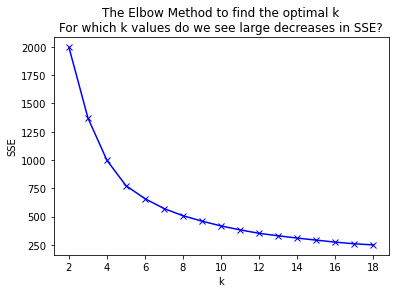

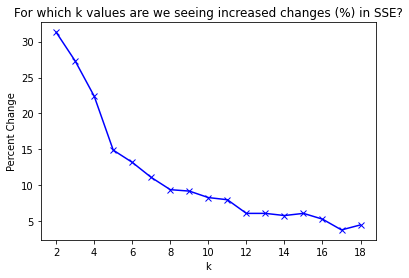

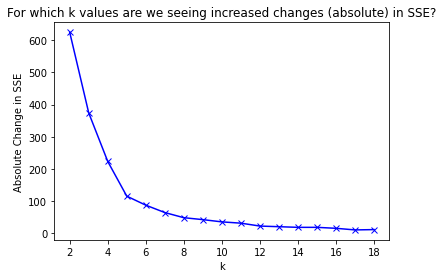

,k,sse,delta,pct_delta
0,2,"1,995.53",625.00,31.30
1,3,"1,370.71",374.00,27.30
2,4,996.78,223.00,22.40
3,5,773.30,115.00,14.90
4,6,658.16,87.00,13.20
5,7,571.30,64.00,11.10
6,8,507.74,48.00,9.40
7,9,459.98,42.00,9.20
8,10,417.55,35.00,8.30
9,11,382.94,31.00,8.00


In [16]:
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin','lot_dollar_sqft_bin' ]
cluster_name = 'price_cluster'
k_range = range(2,20)

find_k(X[0], cluster_vars, k_range)


In [18]:
#Review  train has clusters
X[0].head()

,basementsqft,bathrooms,bedrooms,calculatedfinishedsquarefeet,fireplacecnt,garagecarcnt,latitude,longitude,has_spa_hottub,pool_w_spa_hottub,pool_wo_spa_hottub,hasfireplace,taxdelinquencyflag,haspool,years_taxdeliquent,home_age,home_age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_sqft_bin,lot_dollar_sqft_bin,bath_bed_ratio,scaled_latitude,scaled_longitude,scaled_bathrooms,scaled_bedrooms,scaled_taxrate,scaled_garagecarcnt,scaled_basementsqft,scaled_years_taxdeliquent,area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_home_age_bin,size_cluster,centroid_scaled_bathrooms,centroid_sqft_bin,centroid_acres_bin,centroid_scaled_bedrooms,tax_due_cluster,centroid_taxdelinquencyflag,centroid_years_taxdeliquent,price_cluster,centroid_taxrate,centroid_structure_dollar_sqft_bin,centroid_lot_dollar_sqft_bin
34305,0.00,1.00,3.00,"1,066.00",0.00,0.00,33.92,-118.14,0.00,0.00,0.00,0,0,0,0.00,67.00,0.47,1.26,0.13,0.10,0.20,0.30,0.30,0.33,0.40,0.61,0.00,0.33,0.14,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36
38319,0.00,2.00,3.00,"1,681.00",0.00,0.00,34.18,-118.30,0.00,0.00,0.00,0,0,0,0.00,94.00,0.67,1.25,0.28,0.30,0.40,0.10,0.10,0.67,0.57,0.48,0.17,0.33,0.14,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36
20613,0.00,3.00,2.00,"1,974.00",0.00,0.00,34.15,-118.04,0.00,0.00,0.00,0,0,0,0.00,59.00,0.40,1.19,0.27,0.30,0.40,0.40,0.30,1.50,0.55,0.68,0.33,0.17,0.13,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36
53206,0.00,3.00,4.00,"2,537.00",0.00,0.00,33.74,-118.35,0.00,0.00,0.00,0,0,0,0.00,57.00,0.40,1.15,0.27,0.30,0.60,0.30,0.40,0.75,0.27,0.43,0.33,0.50,0.12,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36
48934,0.00,2.00,3.00,"1,426.00",0.00,0.00,34.69,-118.11,0.00,0.00,0.00,0,0,0,0.00,47.00,0.33,1.67,0.18,0.20,0.30,0.30,0.10,0.67,0.92,0.63,0.17,0.33,0.18,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36


Create Dummies for clusters

In [19]:
# update datatypes of binned values to be float
X[0] = X[0].astype({'size_cluster': 'category', 'area_cluster': 'category', 'price_cluster': 'category', 'tax_due_cluster': 'category' })
dummy_df = pd.get_dummies(X[0][['size_cluster','area_cluster', 'price_cluster', 'tax_due_cluster']], dummy_na=False, drop_first=[True, True])

# append dummy df cols to the original df. 
X[0] = pd.concat([X[0], dummy_df], axis=1)

X[0].head()

,basementsqft,bathrooms,bedrooms,calculatedfinishedsquarefeet,fireplacecnt,garagecarcnt,latitude,longitude,has_spa_hottub,pool_w_spa_hottub,pool_wo_spa_hottub,hasfireplace,taxdelinquencyflag,haspool,years_taxdeliquent,home_age,home_age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_sqft_bin,lot_dollar_sqft_bin,bath_bed_ratio,scaled_latitude,scaled_longitude,scaled_bathrooms,scaled_bedrooms,scaled_taxrate,scaled_garagecarcnt,scaled_basementsqft,scaled_years_taxdeliquent,area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_home_age_bin,size_cluster,centroid_scaled_bathrooms,centroid_sqft_bin,centroid_acres_bin,centroid_scaled_bedrooms,tax_due_cluster,centroid_taxdelinquencyflag,centroid_years_taxdeliquent,price_cluster,centroid_taxrate,centroid_structure_dollar_sqft_bin,centroid_lot_dollar_sqft_bin,size_cluster_1,size_cluster_2,size_cluster_3,size_cluster_4,size_cluster_5,area_cluster_1,area_cluster_2,area_cluster_3,price_cluster_1,price_cluster_2,price_cluster_3,price_cluster_4,tax_due_cluster_1,tax_due_cluster_2
34305,0.00,1.00,3.00,"1,066.00",0.00,0.00,33.92,-118.14,0.00,0.00,0.00,0,0,0,0.00,67.00,0.47,1.26,0.13,0.10,0.20,0.30,0.30,0.33,0.40,0.61,0.00,0.33,0.14,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36,0,0,0,1,0,1,0,0,1,0,0,0,0,0
38319,0.00,2.00,3.00,"1,681.00",0.00,0.00,34.18,-118.30,0.00,0.00,0.00,0,0,0,0.00,94.00,0.67,1.25,0.28,0.30,0.40,0.10,0.10,0.67,0.57,0.48,0.17,0.33,0.14,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36,0,0,0,1,0,1,0,0,1,0,0,0,0,0
20613,0.00,3.00,2.00,"1,974.00",0.00,0.00,34.15,-118.04,0.00,0.00,0.00,0,0,0,0.00,59.00,0.40,1.19,0.27,0.30,0.40,0.40,0.30,1.50,0.55,0.68,0.33,0.17,0.13,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36,0,0,0,1,0,1,0,0,1,0,0,0,0,0
53206,0.00,3.00,4.00,"2,537.00",0.00,0.00,33.74,-118.35,0.00,0.00,0.00,0,0,0,0.00,57.00,0.40,1.15,0.27,0.30,0.60,0.30,0.40,0.75,0.27,0.43,0.33,0.50,0.12,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36,0,0,0,1,0,1,0,0,1,0,0,0,0,0
48934,0.00,2.00,3.00,"1,426.00",0.00,0.00,34.69,-118.11,0.00,0.00,0.00,0,0,0,0.00,47.00,0.33,1.67,0.18,0.20,0.30,0.30,0.10,0.67,0.92,0.63,0.17,0.33,0.18,0.00,0.00,0.00,1,0.46,0.73,0.39,4,0.02,0.14,0.12,0.21,0,-0.00,0.00,1,1.22,0.39,0.36,0,0,0,1,0,1,0,0,1,0,0,0,0,0


## Modeling

### Running best model on test sample

## Conclusion

#### Summary

- 

- 

- 

#### Recommendations

- 

- 

- 

#### Next Steps

- 

- 

- 

